In [ ]:
!pip install pandas wbdata matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


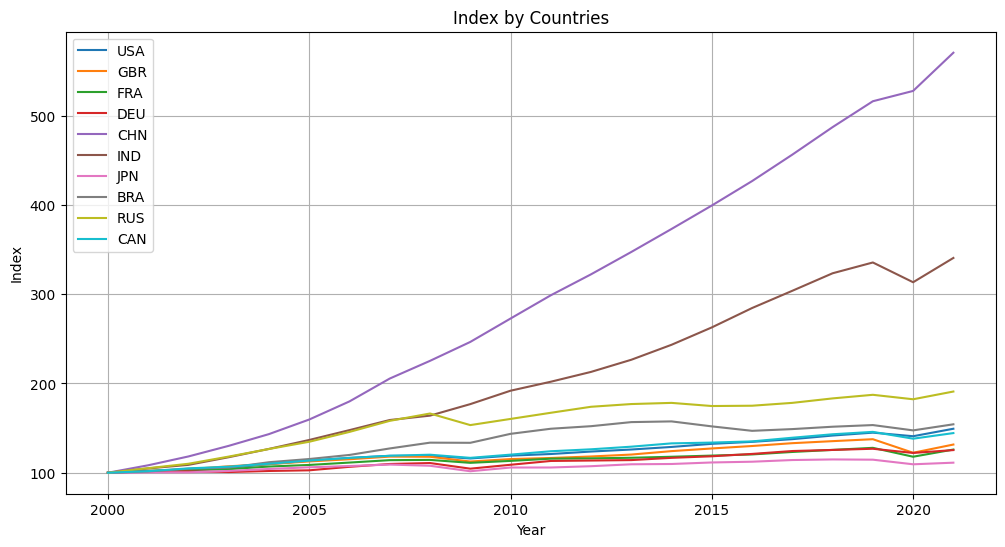

In [ ]:
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import requests

WORLD_BANK_API_BASE = "https://api.worldbank.org/v2"
countries = ["USA", "GBR", "FRA", "DEU", "CHN", "IND", "JPN", "BRA", "RUS", "CAN"]
start_year = 2000
end_year = 2021
indicator = "NY.GDP.MKTP.KD.ZG"

# Function to fetch data from the World Bank API
def fetch_data_from_world_bank_api(country, indicator, start_year, end_year):
    url = f"{WORLD_BANK_API_BASE}/country/{country}/indicator/{indicator}?date={start_year}:{end_year}&format=json"
    response = requests.get(url)
    data = response.json()
    
    if data and len(data) > 1:
        return {int(item["date"]): item["value"] for item in data[1] if item["value"] is not None}
    else:
        return {}


# Group the data by country and calculate the CAGR and index for each country
country_cagr_index_data = []

for country in countries:
    growth_by_years = fetch_data_from_world_bank_api(country, indicator, start_year, end_year)
    
    # Calculate the cumulative index
    cumulative_index = [100]
    for year in range(start_year + 1, end_year+1):
        growth = growth_by_years.get(year)
        if growth is not None:
            cumulative_index.append(cumulative_index[-1] * (1 + growth / 100))
        else:
            cumulative_index.append(cumulative_index[-1])
    
    # Calculate the CAGR
    beginning_value = 100
    ending_value = cumulative_index[-1]
    number_of_years = end_year - start_year
    cagr = (ending_value / beginning_value) ** (1 / number_of_years) - 1
    
    # Create a dictionary with the results and append it to the list
    country_cagr_index_data.append({
        "Country": country,
        "CAGR": cagr,
        "Index": cumulative_index
    })

# Create the line plot with the index by countries
plt.figure(figsize=(12, 6))

for country_data in country_cagr_index_data:
    country = country_data["Country"]
    index = country_data["Index"]
    plt.plot(range(start_year, end_year + 1), index, label=country)

plt.xlabel("Year")
plt.ylabel("Index")
plt.title("Index by Countries")
plt.legend()
plt.grid()
plt.show()



<ipython-input-13-7dd9b54286df>:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20c', len(country_cagr_index_data))


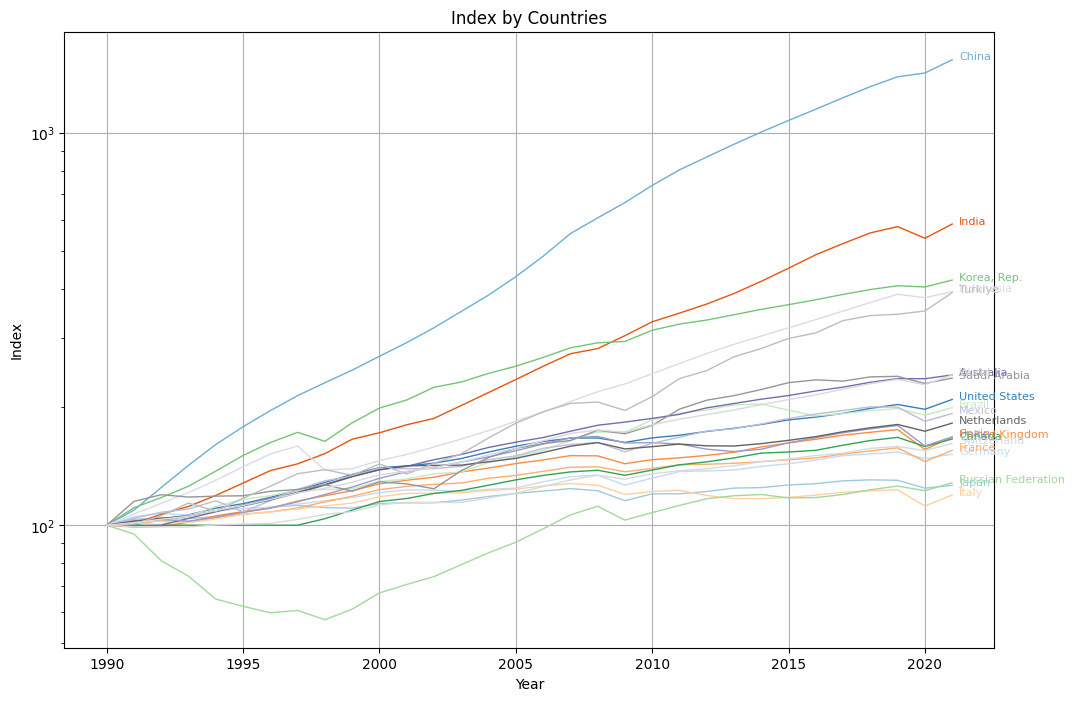

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

WORLD_BANK_API_BASE = "https://api.worldbank.org/v2"
countries = ["USA", "CHN", "JPN", "DEU", "IND", "GBR", "FRA", "ITA", "CAN", "KOR", "RUS", "BRA", "AUS", "ESP", "MEX", "IDN", "NLD", "SAU", "TUR", "CHE","WLD"]
start_year = 1990
end_year = 2021
indicator = "NY.GDP.MKTP.KD.ZG"

# Function to fetch data from the World Bank API
# Function to fetch data from the World Bank API
def fetch_data_from_world_bank_api(country_code, indicator, start_year, end_year, fetch_country_name=False):
    url = f"{WORLD_BANK_API_BASE}/country/{country_code}/indicator/{indicator}?date={start_year}:{end_year}&format=json"
    response = requests.get(url)
    data = response.json()

    if data and len(data) > 1:
        if fetch_country_name:
            country_name = data[1][0]["country"]["value"]
            return country_name, {int(item["date"]): item["value"] for item in data[1] if item["value"] is not None}
        else:
            return {int(item["date"]): item["value"] for item in data[1] if item["value"] is not None}
    else:
        return {}, {}


# Group the data by country and calculate the CAGR and index for each country
country_cagr_index_data = []

for country_code in countries:
    country_name, growth_by_years = fetch_data_from_world_bank_api(country_code, indicator, start_year, end_year, fetch_country_name=True)

    # Calculate the cumulative index
    cumulative_index = [100]
    for year in range(start_year + 1, end_year + 1):
        growth = growth_by_years.get(year)
        if growth is not None:
            cumulative_index.append(cumulative_index[-1] * (1 + growth / 100))
        else:
            cumulative_index.append(cumulative_index[-1])

    # Calculate the CAGR
    beginning_value = 100
    ending_value = cumulative_index[-1]
    number_of_years = end_year - start_year
    cagr = (ending_value / beginning_value) ** (1 / number_of_years) - 1

    # Create a dictionary with the results and append it to the list
    country_cagr_index_data.append({
        "Country": country_name,
        "CAGR": cagr,
        "Index": cumulative_index,
        "Ending Value": ending_value,
        "Beginning Value": beginning_value,
        "Number of Years": number_of_years
    })


# Create the DataFrame with the results
df = pd.DataFrame(country_cagr_index_data)

# Add a new column to the DataFrame for each country's index data
for country_data in country_cagr_index_data:
    country = country_data["Country"]
    index = country_data["Index"]
    df.loc[df['Country'] == country, 'Index'] = [str(index)]


import numpy as np

# Create the line plot with the index by countries
plt.figure(figsize=(12, 8))  # Increase the height to 8

# Set the colormap
colors = plt.cm.get_cmap('tab20c', len(country_cagr_index_data))

for i, country_data in enumerate(country_cagr_index_data):
    country = country_data["Country"]
    index = country_data["Index"]
    plt.plot(range(start_year, end_year + 1), index, label=country, linewidth=1, color=colors(i))

    # Add country labels near the lines
    xpos = end_year
    ypos = index[-1]
    plt.annotate(country, (xpos, ypos), textcoords="offset points", xytext=(5, 0), ha='left', fontsize=8, color=colors(i))

# Set the axis labels and title
plt.xlabel("Year")
plt.ylabel("Index")
plt.title("Index by Countries")

# Set the Y-axis to a log scale
plt.yscale('log')

# Add a grid
plt.grid()

# Show the plot
plt.show()




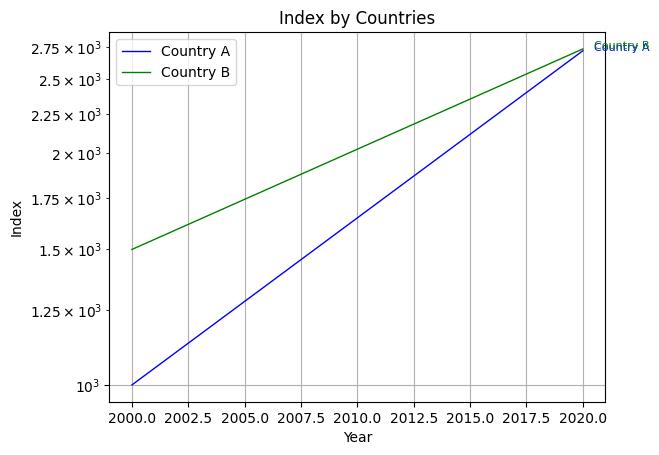

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
years = np.arange(2000, 2021, 1)
index_values_A = 1000 * np.exp(0.05 * (years - 2000))
index_values_B = 1500 * np.exp(0.03 * (years - 2000))

# Plot the index values over time with slim lines and different colors
plt.plot(years, index_values_A, lw=1, color='blue', label='Country A')
plt.plot(years, index_values_B, lw=1, color='green', label='Country B')

# Set the axis labels and title
plt.xlabel("Year")
plt.ylabel("Index")
plt.title("Index by Countries")

# Set the Y-axis to a log scale
plt.yscale('log')

# Add a legend and grid
plt.legend(loc='upper left')
plt.grid()

# Annotate each line near its end
for i, label in enumerate(['Country A', 'Country B']):
    plt.annotate(label, xy=(years[-1], index_values_A[-1] if i == 0 else index_values_B[-1]), xytext=(years[-1] + 0.5, index_values_A[-1] if i == 0 else index_values_B[-1]),
                 fontsize=8, color='blue' if i == 0 else 'green')

# Show the plot
plt.show()


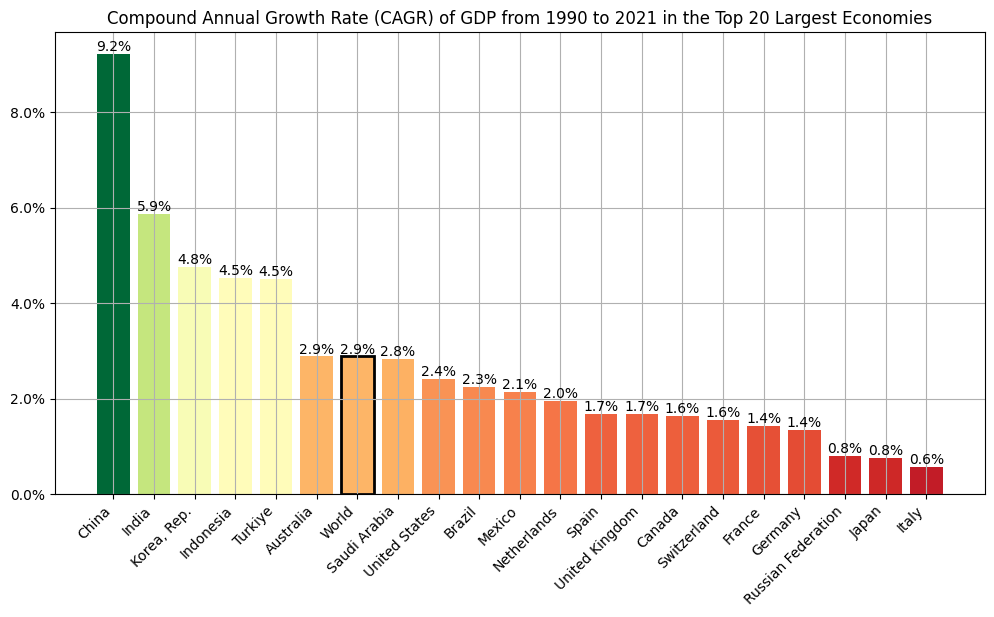

In [ ]:
#@title ENG
import matplotlib.cm as cm
import matplotlib.ticker as mtick

# Create the DataFrame with the results
df = pd.DataFrame(country_cagr_index_data)

# Sort the DataFrame by CAGR in descending order
df_sorted = df.sort_values(by=['CAGR'], ascending=False)

# Get the start year and end year of the data from the original `df` DataFrame
start_year = start_year
end_year = end_year

# Create the bar plot with the CAGR by countries
plt.figure(figsize=(12, 6))

# Define the color gradient
colors = cm.RdYlGn(df_sorted['CAGR'] / df_sorted['CAGR'].max())

for country_name, cagr, color in zip(df_sorted['Country'], df_sorted['CAGR'], colors):
    if country_name == "World":
        # Use a different edge color for the "WLD" country
        plt.bar(country_name, cagr, color=color, edgecolor='black', linewidth=2)
    else:
        plt.bar(country_name, cagr, color=color)

    # Add a caption to the plot
    caption = f"{cagr*100:.1f}%"
    plt.annotate(caption, (country_name, cagr), ha='center', va='bottom')

plt.title(f"Compound Annual Growth Rate (CAGR) of GDP from {start_year} to {end_year} in the Top 20 Largest Economies")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.grid()
plt.savefig('gdp_cagr_en', format='png', dpi=600, bbox_inches='tight')
plt.show()


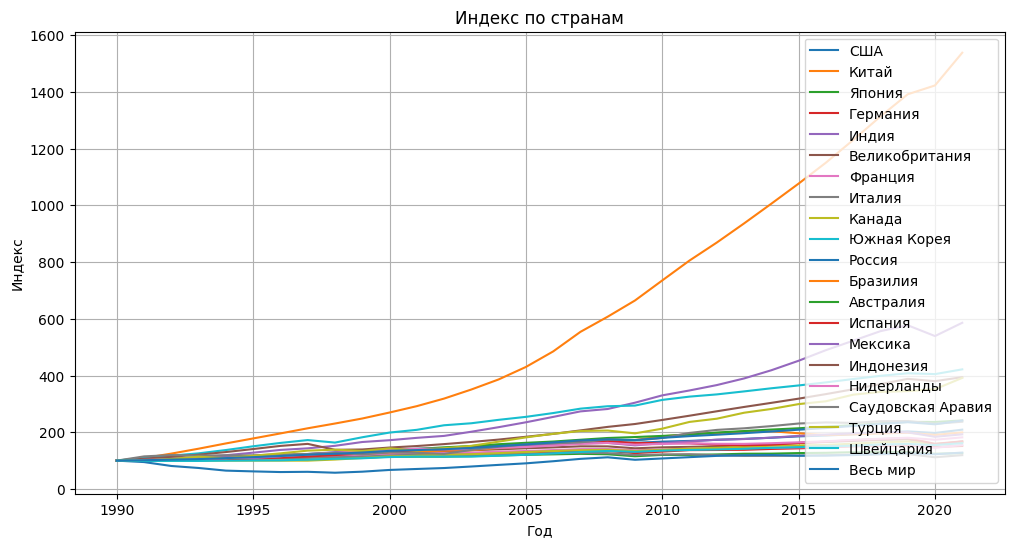

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

WORLD_BANK_API_BASE = "https://api.worldbank.org/v2"
countries = ["USA", "CHN", "JPN", "DEU", "IND", "GBR", "FRA", "ITA", "CAN", "KOR", "RUS", "BRA", "AUS", "ESP", "MEX", "IDN", "NLD", "SAU", "TUR", "CHE","WLD"]
start_year = 1990
end_year = 2021
indicator = "NY.GDP.MKTP.KD.ZG"

# Словарь с названиями стран на русском языке
country_names_russian = {
    "USA": "США",
    "CHN": "Китай",
    "JPN": "Япония",
    "DEU": "Германия",
    "IND": "Индия",
    "GBR": "Великобритания",
    "FRA": "Франция",
    "ITA": "Италия",
    "CAN": "Канада",
    "KOR": "Южная Корея",
    "RUS": "Россия",
    "BRA": "Бразилия",
    "AUS": "Австралия",
    "ESP": "Испания",
    "MEX": "Мексика",
    "IDN": "Индонезия",
    "NLD": "Нидерланды",
    "SAU": "Саудовская Аравия",
    "TUR": "Турция",
    "CHE": "Швейцария",
    "WLD": "Весь мир"
}

def fetch_data_from_world_bank_api(country_code, indicator, start_year, end_year, fetch_country_name=False):
    url = f"{WORLD_BANK_API_BASE}/country/{country_code}/indicator/{indicator}?date={start_year}:{end_year}&format=json"
    response = requests.get(url)
    data = response.json()

    if data and len(data) > 1:
        if fetch_country_name:
            country_name = country_names_russian[country_code] # Используем словарь для получения имени страны на русском языке
            return country_name, {int(item["date"]): item["value"] for item in data[1] if item["value"] is not None}
        else:
            return {int(item["date"]): item["value"] for item in data[1] if item["value"] is not None}
    else:
        return {}, {}

# Остальная часть
# Group the data by country and calculate the CAGR and index for each country
country_cagr_index_data = []

for country_code in countries:
    country_name, growth_by_years = fetch_data_from_world_bank_api(country_code, indicator, start_year, end_year, fetch_country_name=True)

    # Calculate the cumulative index
    cumulative_index = [100]
    for year in range(start_year + 1, end_year + 1):
        growth = growth_by_years.get(year)
        if growth is not None:
            cumulative_index.append(cumulative_index[-1] * (1 + growth / 100))
        else:
            cumulative_index.append(cumulative_index[-1])

    # Calculate the CAGR
    beginning_value = 100
    ending_value = cumulative_index[-1]
    number_of_years = end_year - start_year
    cagr = (ending_value / beginning_value) ** (1 / number_of_years) - 1

    # Create a dictionary with the results and append it to the list
    country_cagr_index_data.append({
        "Country": country_name,
        "CAGR": cagr,
        "Index": cumulative_index,
        "Ending Value": ending_value,
        "Beginning Value": beginning_value,
        "Number of Years": number_of_years
    })

# Create the DataFrame with the results
df = pd.DataFrame(country_cagr_index_data)

# Add a new column to the DataFrame for each country's index data
for country_data in country_cagr_index_data:
    country = country_data["Country"]
    index = country_data["Index"]
    df.loc[df['Country'] == country, 'Index'] = [str(index)]

# Create the line plot with the index by countries
plt.figure(figsize=(12, 6))

for country_data in country_cagr_index_data:
    country = country_data["Country"]
    index = country_data["Index"]
    plt.plot(range(start_year, end_year + 1), index, label=country)

plt.xlabel("Год")
plt.ylabel("Индекс")
plt.title("Индекс по странам")
plt.legend()
plt.grid()
plt.show()


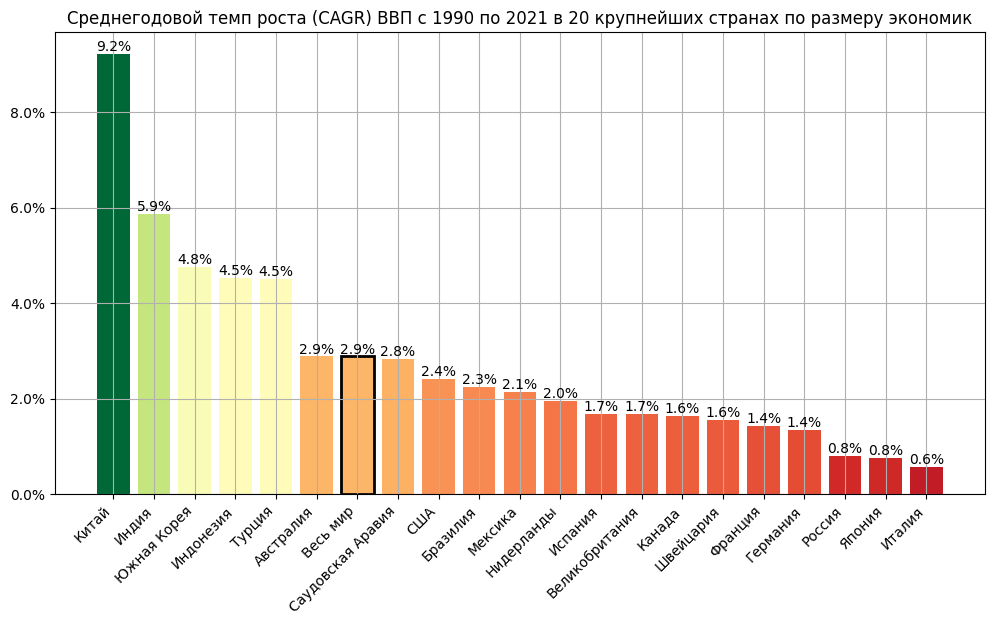

In [ ]:
#@title RU
import matplotlib.cm as cm
import matplotlib.ticker as mtick

# Создание DataFrame с результатами
df = pd.DataFrame(country_cagr_index_data)

# Сортировка DataFrame по CAGR по убыванию
df_sorted = df.sort_values(by=['CAGR'], ascending=False)

# Получение начального и конечного года данных из исходного DataFrame `df`
start_year = start_year
end_year = end_year

# Создание столбчатой диаграммы с CAGR по странам
plt.figure(figsize=(12, 6))

# Определение цветовой градиенты
colors = cm.RdYlGn(df_sorted['CAGR'] / df_sorted['CAGR'].max())

for country_name, cagr, color in zip(df_sorted['Country'], df_sorted['CAGR'], colors):
    if country_name == "Весь мир":
        # Использовать другой цвет границы для страны "WLD"
        plt.bar(country_name, cagr, color=color, edgecolor='black', linewidth=2)
    else:
        plt.bar(country_name, cagr, color=color)

    # Добавление подписи к графику
    caption = f"{cagr*100:.1f}%"
    plt.annotate(caption, (country_name, cagr), ha='center', va='bottom')

plt.title(f"Среднегодовой темп роста (CAGR) ВВП с {start_year} по {end_year} в 20 крупнейших странах по размеру экономик")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.grid()
plt.savefig('gdp_cagr', format='png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd


# select only the Country and CAGR columns
df_export = df_sorted[['Country', 'CAGR']]

# export the DataFrame to Excel
df_export.to_excel('output.xlsx', index=False)


In [ ]:
#@title EN. Таблица номинального ВВП по странам
import requests
import pandas as pd
from IPython.display import display

# Function to split the list of country codes into smaller chunks
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# Set the base URL for the World Bank API
WORLD_BANK_API_BASE = "https://api.worldbank.org/v2"

# Set the endpoint for the GDP data for all countries in 2021
indicator_code = "NY.GDP.MKTP.CD"
start_year = 2021
end_year = 2021

country_codes = ["ABW", "AFG", "AGO", "ALB", "AND", "ARE", "ARG", "ARM", "ASM", "ATG", "AUS", "AUT", "AZE", "BDI", "BEL", "BEN", "BFA", "BGD", "BGR", "BHR", "BHS", "BIH", "BLR", "BLZ", "BMU", "BOL", "BRA", "BRB", "BRN", "BTN", "BWA", "CAF", "CAN", "CHE", "CHL", "CHN", "CIV", "CMR", "COD", "COG", "COL", "COM", "CPV", "CRI", "CUB", "CUW", "CYM", "CYP", "CZE", "DEU", "DJI", "DMA", "DNK", "DOM", "DZA", "ECU", "EGY", "ESP", "EST", "ETH", "FIN", "FJI", "FRA", "FSM", "GAB", "GBR", "GEO", "GHA", "GIN", "GMB", "GNB", "GNQ", "GRC", "GRD", "GTM", "GUM", "GUY", "HKG", "HND", "HRV", "HTI", "HUN", "IDN", "IND", "IRL", "IRN", "IRQ", "ISL", "ISR", "ITA", "JAM", "JOR", "JPN", "KAZ", "KEN", "KGZ", "KHM", "KIR", "KNA", "KOR", "KWT", "LAO", "LBN", "LBR", "LBY", "LCA", "LIE", "LKA", "LSO", "LTU", "LUX", "LVA", "MAC", "MAF", "MAR", "MCO", "MDA", "MDG", "MDV", "MEX", "MHL", "MKD", "MLI", "MLT", "MMR", "MNE", "MNG", "MNP", "MOZ", "MRT", "MUS", "MWI", "MYS", "NAM", "NER", "NGA", "NIC", "NLD", "NOR", "NPL", "NRU", "NZL", "OMN", "PAK", "PAN", "PER", "PHL", "PLW", "PNG", "POL", "PRI", "PRT", "PRY", "PYF", "QAT", "ROU", "RUS", "RWA", "SAU", "SDN", "SEN", "SGP", "SLB", "SLE", "SLV", "SMR", "SOM", "SRB", "SSD", "STP", "SUR","SVK", "SVN", "SWE", "SWZ", "SXM", "SYC", "SYR", "TCA", "TCD", "TGO", "THA", "TJK", "TKM", "TLS", "TON", "TTO", "TUN", "TUR", "TUV", "TZA", "UGA", "UKR", "URY", "USA", "UZB" , "VCT" , "VEN", "VGB", "VIR", "VNM", "VUT","WSM","XKX","ZAF","ZMB","ZWE"]

# Create an empty DataFrame to store the GDP data
df_gdp = pd.DataFrame()

# Split the list of country codes into smaller chunks of 50
country_code_chunks = list(chunks(country_codes, 50))

# Iterate over each chunk of country codes
for chunk in country_code_chunks:
    # Create the query URL for the current chunk
    query_url = f"{WORLD_BANK_API_BASE}/country/{';'.join(chunk)}/indicator/{indicator_code}?date={start_year}:{end_year}&most_recent_value_desc=true&format=json"

    # Send a GET request to the World Bank API
    response = requests.get(query_url)

    # Parse the JSON data returned by the API into a pandas DataFrame
    data = response.json()[1]
    df_chunk = pd.DataFrame(data)

    # Extract the country code, country name, and GDP columns
    df_chunk_gdp = df_chunk[df_chunk["value"].notnull()][["countryiso3code", "country", "value"]]

    # Append the current chunk's data to the main DataFrame
    df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)

# Extract the country name from the "country" column
df_gdp["Country"] = df_gdp["country"].apply(lambda x: x["value"])

# Convert GDP to billions of USD
df_gdp["GDP (billions of USD)"] = df_gdp["value"] / 1000000000

# Drop the original "country" and "value" columns
df_gdp.drop(columns=["country", "value"], inplace=True)

# Rename the columns
df_gdp.columns = ["Country Code", "Country Name", "GDP (billions of USD)"]

# Sort the DataFrame by GDP in descending order and take the top 20 rows
df_top_20_gdp = df_gdp.sort_values(by="GDP (billions of USD)", ascending=False).head(1000)

# Display the DataFrame as a table
df_top_20_gdp


<ipython-input-64-3e0a2d59ffcf>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)
<ipython-input-64-3e0a2d59ffcf>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)
<ipython-input-64-3e0a2d59ffcf>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)
<ipython-input-64-3e0a2d59ffcf>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)
<ipython-input-64-3e0a2d59ffcf>:43: FutureWarning: The frame.append method is deprecated and

,Country Code,Country Name,GDP (billions of USD)
184,USA,United States,23315.080560
35,CHN,China,17734.062645
91,JPN,Japan,4940.877781
48,DEU,Germany,4259.934912
82,IND,India,3176.295065
...,...,...,...
116,MHL,Marshall Islands,0.259539
142,PLW,Palau,0.217800
96,KIR,Kiribati,0.207031
135,NRU,Nauru,0.133219


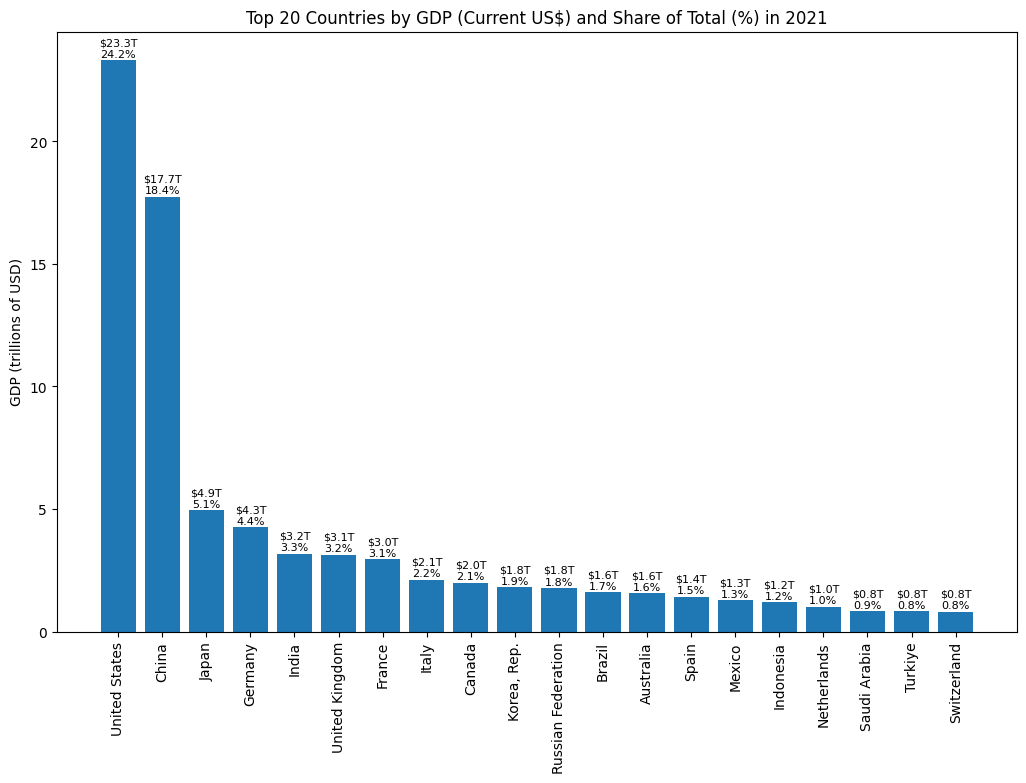

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# ... (the rest of your code above)

# Get the total GDP for the world (WLD)
query_url = f"{WORLD_BANK_API_BASE}/country/WLD/indicator/{indicator_code}?date={start_year}:{end_year}&format=json"
response = requests.get(query_url)
data = response.json()[1]
total_gdp = data[0]['value'] / 1000000000

# Sort the DataFrame by GDP in descending order and take the top 20 rows
df_top_20_gdp = df_gdp.sort_values(by="GDP (billions of USD)", ascending=False).head(20)

# Calculate the share of total GDP for each country in the top 20
df_top_20_gdp['GDP Share (%)'] = (df_top_20_gdp['GDP (billions of USD)'] / total_gdp) * 100

# Convert GDP to trillions of USD
df_top_20_gdp['GDP (trillions of USD)'] = df_top_20_gdp['GDP (billions of USD)'] / 1000

# Plot the top 20 countries by GDP
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_top_20_gdp['Country Name'], df_top_20_gdp['GDP (trillions of USD)'])
plt.xticks(rotation=90)
plt.ylabel('GDP (trillions of USD)')
plt.title(f"Top 20 Countries by GDP (Current US$) and Share of Total (%) in {start_year}")

# Add space between the plot and the border
plt.subplots_adjust(left=0.1, right=0.9, top=1.2, bottom=0.2)

# Add GDP and percentage labels above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05,
            f'${df_top_20_gdp.iloc[i]["GDP (trillions of USD)"]:.1f}T\n{df_top_20_gdp.iloc[i]["GDP Share (%)"]:.1f}%',
            ha='center', va='bottom', fontsize=8, rotation=0)

plt.savefig('gdp_nominal_en', format='png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# ... (the rest of your code above)

# Iterate over each chunk of country codes
for chunk in country_code_chunks:
    # Create the query URL for the current chunk
    query_url = f"{WORLD_BANK_API_BASE}/country/{';'.join(chunk)}/indicator/{indicator_code}?date={start_year}:{end_year}&most_recent_value_desc=true&format=json&language=ru"

    # Send a GET request to the World Bank API
    response = requests.get(query_url)

    # ... (the rest of your code above)

# ... (the rest of your code above, until the HTML generation part)

# Convert the DataFrame to an HTML table
html_table = df_top_20_gdp[['Country Name', 'GDP (trillions of USD)', 'GDP Share (%)']].to_html(index=False, classes="gdp-table", float_format="%.2f")

# Add CSS styles to the table elements
html_table_with_styles = f'''
<style>
  .gdp-table {{
    border-collapse: collapse;
    width: 100%;
    font-family: Arial, sans-serif;
  }}
  .gdp-table th {{
    background-color: #f2f2f2;
    text-align: left;
    padding: 8px;
    border: 1px solid #ddd;
  }}
  .gdp-table td {{
    padding: 8px;
    border: 1px solid #ddd;
  }}
  .gdp-table tr:nth-child(even) {{
    background-color: #f2f2f2;
  }}
</style>
{html_table}
'''

# Print the HTML table with styles
print(html_table_with_styles)



<style>
  .gdp-table {
    border-collapse: collapse;
    width: 100%;
    font-family: Arial, sans-serif;
  }
  .gdp-table th {
    background-color: #f2f2f2;
    text-align: left;
    padding: 8px;
    border: 1px solid #ddd;
  }
  .gdp-table td {
    padding: 8px;
    border: 1px solid #ddd;
  }
  .gdp-table tr:nth-child(even) {
    background-color: #f2f2f2;
  }
</style>
<table border="1" class="dataframe gdp-table">
  <thead>
    <tr style="text-align: right;">
      <th>Country Name</th>
      <th>GDP (trillions of USD)</th>
      <th>GDP Share (%)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>United States</td>
      <td>23.32</td>
      <td>24.15</td>
    </tr>
    <tr>
      <td>China</td>
      <td>17.73</td>
      <td>18.37</td>
    </tr>
    <tr>
      <td>Japan</td>
      <td>4.94</td>
      <td>5.12</td>
    </tr>
    <tr>
      <td>Germany</td>
      <td>4.26</td>
      <td>4.41</td>
    </tr>
    <tr>
      <td>India</td>
      <td>3.18</td>
      <td>3.29</td

In [ ]:
#@title Русский. Таблица номинального ВВП по странам
import requests
import pandas as pd
from IPython.display import display

# Function to split the list of country codes into smaller chunks
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# Set the base URL for the World Bank API
WORLD_BANK_API_BASE = "https://api.worldbank.org/v2"

# Set the endpoint for the GDP data for all countries in 2021
indicator_code = "NY.GDP.MKTP.CD"
start_year = 2021
end_year = 2021

country_codes = ["ABW", "AFG", "AGO", "ALB", "AND", "ARE", "ARG", "ARM", "ASM", "ATG", "AUS", "AUT", "AZE", "BDI", "BEL", "BEN", "BFA", "BGD", "BGR", "BHR", "BHS", "BIH", "BLR", "BLZ", "BMU", "BOL", "BRA", "BRB", "BRN", "BTN", "BWA", "CAF", "CAN", "CHE", "CHL", "CHN", "CIV", "CMR", "COD", "COG", "COL", "COM", "CPV", "CRI", "CUB", "CUW", "CYM", "CYP", "CZE", "DEU", "DJI", "DMA", "DNK", "DOM", "DZA", "ECU", "EGY", "ESP", "EST", "ETH", "FIN", "FJI", "FRA", "FSM", "GAB", "GBR", "GEO", "GHA", "GIN", "GMB", "GNB", "GNQ", "GRC", "GRD", "GTM", "GUM", "GUY", "HKG", "HND", "HRV", "HTI", "HUN", "IDN", "IND", "IRL", "IRN", "IRQ", "ISL", "ISR", "ITA", "JAM", "JOR", "JPN", "KAZ", "KEN", "KGZ", "KHM", "KIR", "KNA", "KOR", "KWT", "LAO", "LBN", "LBR", "LBY", "LCA", "LIE", "LKA", "LSO", "LTU", "LUX", "LVA", "MAC", "MAF", "MAR", "MCO", "MDA", "MDG", "MDV", "MEX", "MHL", "MKD", "MLI", "MLT", "MMR", "MNE", "MNG", "MNP", "MOZ", "MRT", "MUS", "MWI", "MYS", "NAM", "NER", "NGA", "NIC", "NLD", "NOR", "NPL", "NRU", "NZL", "OMN", "PAK", "PAN", "PER", "PHL", "PLW", "PNG", "POL", "PRI", "PRT", "PRY", "PYF", "QAT", "ROU", "RUS", "RWA", "SAU", "SDN", "SEN", "SGP", "SLB", "SLE", "SLV", "SMR", "SOM", "SRB", "SSD", "STP", "SUR","SVK", "SVN", "SWE", "SWZ", "SXM", "SYC", "SYR", "TCA", "TCD", "TGO", "THA", "TJK", "TKM", "TLS", "TON", "TTO", "TUN", "TUR", "TUV", "TZA", "UGA", "UKR", "URY", "USA", "UZB" , "VCT" , "VEN", "VGB", "VIR", "VNM", "VUT","WSM","XKX","ZAF","ZMB","ZWE"]

country_names_russian = {
    "ABW": "Аруба",
    "AFG": "Афганистан",
    "AGO": "Ангола",
    "ALB": "Албания",
    "AND": "Андорра",
    "ARE": "Объединенные Арабские Эмираты",
    "ARG": "Аргентина",
    "ARM": "Армения",
    "ASM": "Американское Самоа",
    "ATG": "Антигуа и Барбуда",
    "AUS": "Австралия",
    "AUT": "Австрия",
    "AZE": "Азербайджан",
    "BDI": "Бурунди",
    "BEL": "Бельгия",
    "BEN": "Бенин",
    "BFA": "Буркина-Фасо",
    "BGD": "Бангладеш",
    "BGR": "Болгария",
    "BHR": "Бахрейн",
    "BHS": "Багамы",
    "BIH": "Босния и Герцеговина",
    "BLR": "Беларусь",
    "BLZ": "Белиз",
    "BMU": "Бермуды",
    "BOL": "Боливия",
    "BRA": "Бразилия",
    "BRB": "Барбадос",
    "BRN": "Бруней",
    "BTN": "Бутан",
    "BWA": "Ботсвана",
    "CAF": "Центрально-Африканская Республика",
    "CAN": "Канада",
    "CHE": "Швейцария",
    "CHL": "Чили",
    "CHN": "Китай",
    "CIV": "Кот-д'Ивуар",
    "CMR": "Камерун",
    "COD": "Демократическая Республика Конго",
    "COG": "Республика Конго",
    "COL": "Колумбия",
    "COM": "Коморы",
    "CPV": "Кабо-Верде",
    "CRI": "Коста-Рика",
    "CUB": "Куба",
    "CUW": "Кюрасао",
    "CYM": "Острова Кайман",
    "CYP": "Кипр",
    "CZE": "Чехия",
    "DEU": "Германия",
    "DJI": "Джибути",
    "DMA": "Доминика",
    "DNK": "Дания",
    "DOM": "Доминиканская Республика",
    "DZA": "Алжир",
    "ECU": "Эквадор",
    "EGY": "Египет",
    "ESP": "Испания",
    "EST":"Эстония",
    "ETH": "Эфиопия",
    "FIN": "Финляндия",
    "FJI": "Фиджи",
    "FRA": "Франция",
    "FSM": "Федеративные Штаты Микронезии",
    "GAB": "Габон",
    "GBR": "Великобритания",
    "GEO": "Грузия",
    "GHA": "Гана",
    "GIN": "Гвинея",
    "GMB": "Гамбия",
    "GNB": "Гвинея-Бисау",
    "GNQ": "Экваториальная Гвинея",
    "GRC": "Греция",
    "GRD": "Гренада",
    "GTM": "Гватемала",
    "GUM": "Гуам",
    "GUY": "Гайана",
    "HKG": "Гонконг",
    "HND": "Гондурас",
    "HRV": "Хорватия",
    "HTI": "Гаити",
    "HUN": "Венгрия",
    "IDN": "Индонезия",
    "IND": "Индия",
    "IRL": "Ирландия",
    "IRN": "Иран",
    "IRQ": "Ирак",
    "ISL": "Исландия",
    "ISR": "Израиль",
    "ITA": "Италия",
    "JAM": "Ямайка",
    "JOR": "Иордания",
    "JPN": "Япония",
    "KAZ": "Казахстан",
    "KEN": "Кения",
    "KGZ": "Киргизия",
    "KHM": "Камбоджа",
    "KIR": "Кирибати",
    "KNA": "Сент-Китс и Невис",
    "KOR": "Южная Корея",
    "KWT": "Кувейт",
    "LAO": "Лаос",
    "LBN": "Ливан",
    "LBR": "Либерия",
    "LBY": "Ливия",
    "LCA": "Сент-Люсия",
    "LIE": "Лихтенштейн",
    "LKA": "Шри-Ланка",
    "LSO": "Лесото",
    "LTU": "Литва",
    "LUX": "Люксембург",
    "LVA": "Латвия",
    "MAC": "Макао",
    "MAF": "Сен-Мартен",
    "MAR": "Марокко",
    "MCO": "Монако",
    "MDA": "Молдова",
    "MDG": "Мадагаскар",
    "MDV": "Мальдивы",
    "MEX": "Мексика",
    "MHL": "Маршалловы Острова",
    "MKD": "Северная Македония",
    "MLI": "Мали",
    "MLT": "Мальта",
    "MMR": "Мьянма",
    "MNE": "Черногория",
    "MNG": "Монголия",
    "MNP": "Северные Марианские острова",
    "MOZ": "Мозамбик",
    "MRT": "Мавритания",
    "MUS": "Маврикий",
    "MWI": "Малави",
    "MYS": "Малайзия",
    "NAM": "Намибия",
    "NER": "Нигер",
    "NGA": "Нигерия",
    "NIC": "Никарагуа",
    "NLD": "Нидерланды",
    "NOR": "Норвегия",
    "NPL": "Непал",
    "NRU": "Науру",
    "NZL": "Новая Зеландия",
    "OMN": "Оман",
    "PAK": "Пакистан",
    "PAN": "Панама",
    "PER": "Перу",
    "PHL": "Филиппины",
    "PLW": "Палау",
    "PNG": "Папуа - Новая Гвинея",
    "POL": "Польша",
    "PRI": "Пуэрто-Рико",
    "PRT": "Португалия",
    "PRY": "Парагвай",
    "PYF": "Французская Полинезия",
    "QAT": "Катар",
    "ROU": "Румыния",
    "RUS": "Россия",
    "RWA": "Руанда",
    "SAU": "Саудовская Аравия",
    "SDN": "Судан",
    "SEN": "Сенегал",
    "SGP": "Сингапур",
    "SLB": "Соломоновы Острова",
    "SLE": "Сьерра-Леоне",
    "SLV": "Сальвадор",
    "SMR": "Сан-Марино",
    "SOM": "Сомали",
    "SRB": "Сербия",
    "SSD": "Южный Судан",
    "STP": "Сан-Томе и Принсипи",
    "SUR": "Суринам",
    "SVK": "Словакия",
    "SVN": "Словения",
    "SWE": "Швеция",
    "SWZ": "Эсватини",
    "SXM": "Синт-Мартен",
    "SYC": "Сейшелы",
    "SYR": "Сирия",
    "TCA": "Острова Теркс и Кайкос",
    "TCD": "Чад",
    "TGO": "Того",
    "THA": "Таиланд",
    "TJK": "Таджикистан",
    "TKM": "Туркменистан",
    "TLS": "Восточный Тимор",
    "TON": "Тонга",
    "TTO": "Тринидад и Тобаго",
    "TUN": "Тунис",
    "TUR": "Турция",
    "TUV": "Тувалу",
    "TZA": "Танзания",
    "UGA": "Уганда",
    "UKR": "Украина",
    "URY": "Уругвай",
    "USA": "США",
    "UZB": "Узбекистан",
    "VCT": "Сент-Винсент и Гренадины",
    "VEN": "Венесуэла",
    "VGB": "Британские Виргинские острова",
    "VIR": "Американские Виргинские острова",
    "VNM": "Вьетнам",
    "VUT": "Вануату",
    "WSM": "Самоа",
    "XKX": "Косово",
    "ZAF": "Южная Африка",
    "ZMB": "Замбия",
    "ZWE": "Зимбабве"
}


# Create an empty DataFrame to store the GDP data
df_gdp = pd.DataFrame()

# Split the list of country codes into smaller chunks of 50
country_code_chunks = list(chunks(country_codes, 50))

# Iterate over each chunk of country codes
for chunk in country_code_chunks:
    # Create the query URL for the current chunk
    query_url = f"{WORLD_BANK_API_BASE}/country/{';'.join(chunk)}/indicator/{indicator_code}?date={start_year}:{end_year}&most_recent_value_desc=true&format=json"

    # Send a GET request to the World Bank API
    response = requests.get(query_url)

    # Parse the JSON data returned by the API into a pandas DataFrame
    data = response.json()[1]
    df_chunk = pd.DataFrame(data)

    # Extract the country code, country name, and GDP columns
    df_chunk_gdp = df_chunk[df_chunk["value"].notnull()][["countryiso3code", "country", "value"]]

    # Append the current chunk's data to the main DataFrame
    df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)

# Use the country_names_russian dictionary to replace English names with Russian names
df_gdp["Country"] = df_gdp["countryiso3code"].apply(lambda x: country_names_russian[x])

# Convert GDP to billions of USD
df_gdp["GDP (billions of USD)"] = df_gdp["value"] / 1000000000

# Drop the original "country" and "value" columns
df_gdp.drop(columns=["country", "value"], inplace=True)

# Удалить столбец "Country Code" и переименовать оставшиеся столбцы
df_gdp.drop(columns=["countryiso3code"], inplace=True)
df_gdp.columns = ["Страна", "ВВП млрд $"]


# Сортировка DataFrame по ВВП в порядке убывания и выборка топ-20 строк
df_top_20_gdp = df_gdp.sort_values(by="ВВП млрд $", ascending=False).head(1000)

# Форматирование значения ВВП с разделителем пробела и одним знаком после запятой
df_top_20_gdp['ВВП млрд $'] = df_top_20_gdp['ВВП млрд $'].apply(lambda x: f'{x:,.1f}'.replace(",", " "))

# Вывод DataFrame в виде таблицы
display(df_top_20_gdp)



<ipython-input-67-46d738d89c5c>:254: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)
<ipython-input-67-46d738d89c5c>:254: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)
<ipython-input-67-46d738d89c5c>:254: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)
<ipython-input-67-46d738d89c5c>:254: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gdp = df_gdp.append(df_chunk_gdp, ignore_index=True)
<ipython-input-67-46d738d89c5c>:254: FutureWarning: The frame.append method is deprecate

,Страна,ВВП млрд $
184,США,23 315.1
35,Китай,17 734.1
91,Япония,4 940.9
48,Германия,4 259.9
82,Индия,3 176.3
...,...,...
116,Маршалловы Острова,0.3
142,Палау,0.2
96,Кирибати,0.2
135,Науру,0.1


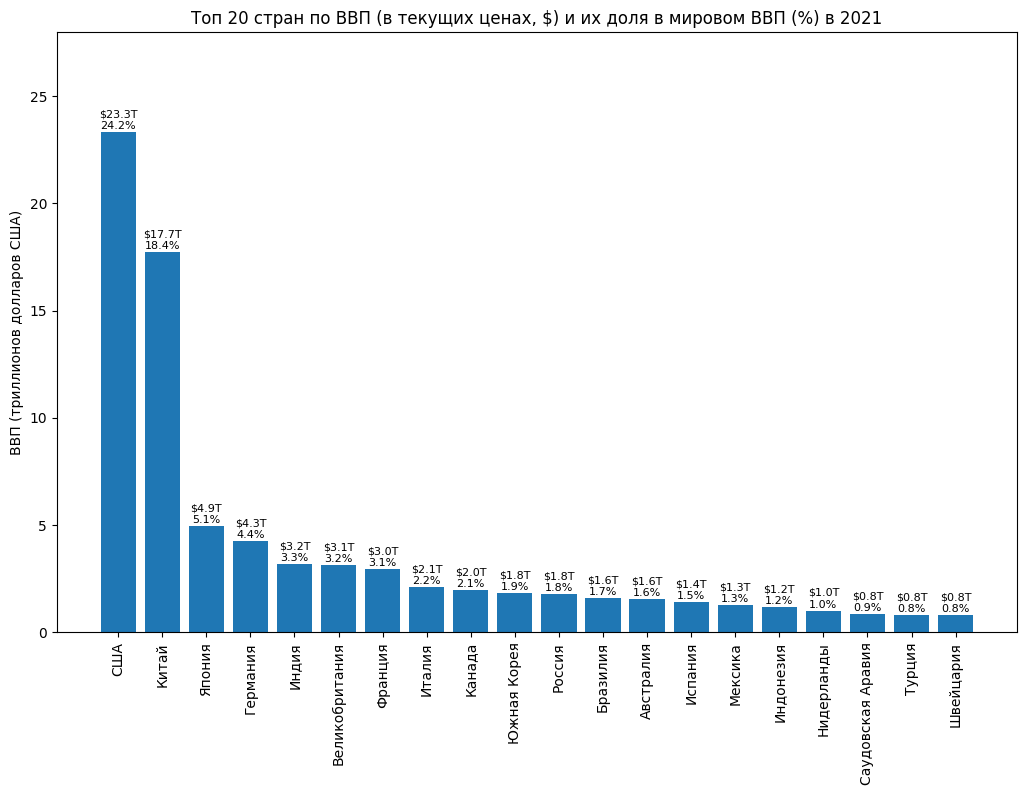

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# ... (the rest of your code above)

# Get the total GDP for the world (WLD)
query_url = f"{WORLD_BANK_API_BASE}/country/WLD/indicator/{indicator_code}?date={start_year}:{end_year}&format=json"
response = requests.get(query_url)
data = response.json()[1]
total_gdp = data[0]['value'] / 1000000000

# Sort the DataFrame by GDP in descending order and take the top 20 rows
df_top_20_gdp = df_gdp.sort_values(by="ВВП млрд $", ascending=False).head(20)

# Calculate the share of total GDP for each country in the top 20
df_top_20_gdp['GDP Share (%)'] = (df_top_20_gdp['ВВП млрд $'] / total_gdp) * 100

# Convert GDP to trillions of USD
df_top_20_gdp['GDP (trillions of USD)'] = df_top_20_gdp['ВВП млрд $'] / 1000

# Plot the top 20 countries by GDP
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_top_20_gdp['Страна'], df_top_20_gdp['GDP (trillions of USD)'])
plt.xticks(rotation=90)
plt.ylabel('ВВП (триллионов долларов США)')
plt.title(f"Топ 20 стран по ВВП (в текущих ценах, $) и их доля в мировом ВВП (%) в {start_year}")

# Add space between the plot and the border
plt.subplots_adjust(left=0.1, right=0.9, top=1.2, bottom=0.2)

# Add GDP and percentage labels above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05,
            f'${df_top_20_gdp.iloc[i]["GDP (trillions of USD)"]:.1f}T\n{df_top_20_gdp.iloc[i]["GDP Share (%)"]:.1f}%',
            ha='center', va='bottom', fontsize=8, rotation=0)

# Adjust the ylim to leave space above the highest bar
ax.set_ylim([0, max(df_top_20_gdp['GDP (trillions of USD)']) * 1.2])

plt.savefig('gdp_nominal', format='png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
from IPython.display import display, HTML

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# ... (the rest of your code above)

# Iterate over each chunk of country codes
for chunk in country_code_chunks:
    # Create the query URL for the current chunk
    query_url = f"{WORLD_BANK_API_BASE}/country/{';'.join(chunk)}/indicator/{indicator_code}?date={start_year}:{end_year}&most_recent_value_desc=true&format=json&language=ru"

    # Send a GET request to the World Bank API
    response = requests.get(query_url)

    # ... (the rest of your code above)

# ... (the rest of your code above, until the HTML generation part)

# Convert the DataFrame to an HTML table
html_table = df_top_20_gdp[['Страна', 'GDP (trillions of USD)', 'GDP Share (%)']].to_html(index=False, classes="gdp-table", float_format="%.2f")

# Add CSS styles to the table elements
html_table_with_styles = f'''
<style>
  .gdp-table {{
    border-collapse: collapse;
    width: 100%;
    font-family: Arial, sans-serif;
  }}
  .gdp-table th {{
    background-color: #f2f2f2;
    text-align: left;
    padding: 8px;
    border: 1px solid #ddd;
  }}
  .gdp-table td {{
    padding: 8px;
    border: 1px solid #ddd;
  }}
  .gdp-table tr:nth-child(even) {{
    background-color: #f2f2f2;
  }}
</style>
{html_table}
'''

# Print the HTML table with styles
print(html_table_with_styles)



<style>
  .gdp-table {
    border-collapse: collapse;
    width: 100%;
    font-family: Arial, sans-serif;
  }
  .gdp-table th {
    background-color: #f2f2f2;
    text-align: left;
    padding: 8px;
    border: 1px solid #ddd;
  }
  .gdp-table td {
    padding: 8px;
    border: 1px solid #ddd;
  }
  .gdp-table tr:nth-child(even) {
    background-color: #f2f2f2;
  }
</style>
<table border="1" class="dataframe gdp-table">
  <thead>
    <tr style="text-align: right;">
      <th>Страна</th>
      <th>GDP (trillions of USD)</th>
      <th>GDP Share (%)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>США</td>
      <td>23.32</td>
      <td>24.15</td>
    </tr>
    <tr>
      <td>Китай</td>
      <td>17.73</td>
      <td>18.37</td>
    </tr>
    <tr>
      <td>Япония</td>
      <td>4.94</td>
      <td>5.12</td>
    </tr>
    <tr>
      <td>Германия</td>
      <td>4.26</td>
      <td>4.41</td>
    </tr>
    <tr>
      <td>Индия</td>
      <td>3.18</td>
      <td>3.29</td>
    </tr>
  